# Demo: Nonloc heatflux

This notebook provide a demo case on the application of the heat conduction solver.
<br>

## Geometry & Computational Grid
In this case, we will consider a 1d plasma with temperature, electron density, ionization rate and Knudsen number profiles, provided by kinetic simulation with length $L  = 0.19$ cm.  We will use $N=400$ nodes for this profile. As you can see, the grid spacing, $dx$ will be $L/(N-1)=476$ $\mu \mathrm{m}$.

First, import parameter module in order to get a Pandas series containing all the parameters.
Last two rows contain a NN training part. The `io.capture_output` function is used to avoid the overfilling of output (to many messages are displayed and VS Code can't manage that)

In case coefficients $\alpha$ and $\beta$ are defined without using the NN, use `model = None`

In [41]:
import pandas as pd
import postprocessing as pp
import matplotlib.pyplot as plt
import importlib
import parameter as param
import heatConduction as hc
importlib.reload(pp)
importlib.reload(hc)
importlib.reload(param)   #In order to apply changes in the module 
%matplotlib widget


All parameters of the problem, such as number of used profiles points, boundary conditions, definition of parameters $\alpha$ and $\beta$, number of timesteps and its magnitude $dt$ are contained and may be modified in `parameter.py` file.

`importlib` module and `reload` function in particullar are used to update modules if modified

`heatConduction.py` package contains necessary components to solve the PDEs.
It also creates a `matplotlib` figure, which will display heatflux calculated using neural network, (if) trained in first cell.

Next cell initiates solution of the problem. The result temperature profiles, last cache and coefficients are contained in these four variables accordingly

### Local transport $\alpha=1$, $\beta = 5/2$

In [42]:

para = param.main()


results, cache, alphas, betas, heatflux = hc.solve(para)

FileNotFoundError: [Errno 2] No such file or directory: './DRPzapocet/Data/initial_profile.csv'

The `results` is a numpy array consist of evolution of each time step over the domain. The `cache` file is a Python dictionary consists of some variables used by debugging. <br>
In order to view the results, import the postprocessing package and preprocess the results. <br>
The preprocess transform the numpy array into a Pandas DataFrame, with index as grid locations and columns as timings.

## Visualization of $\alpha$ and $\beta$

In [50]:
init_profile=pd.read_csv('./initial_profile.csv', index_col=(0))#/DRPzapocet

In [51]:
init_profile[['x','Te', 'Zbar', 'ne']]

,x,Te,Zbar,ne
0,0.010000,2550.190493,1.999184,4.671632e+20
1,0.010450,2550.145819,1.999184,4.673177e+20
2,0.010900,2550.099574,1.999184,4.674773e+20
3,0.011350,2550.051676,1.999184,4.676414e+20
4,0.011800,2550.002033,1.999184,4.678096e+20
...,...,...,...,...
395,0.187754,274.566988,36.520500,7.926455e+21
396,0.188204,274.339281,36.476352,8.021474e+21
397,0.188654,274.139093,36.437388,8.098941e+21
398,0.189104,273.966183,36.402828,8.159613e+21


In [52]:
init_profile.columns

Index(['x', 'Te', 'Zbar', 'ne'], dtype='object')

In [63]:
import numpy as np
le=pd.DataFrame(np.transpose(np.array([np.linspace(1,1e-4, 400), np.linspace(100, 10000, 400), np.linspace(0,0,400), np.linspace(1e10,1e10,400)])),
                              columns=init_profile.columns,index=init_profile.index)

In [65]:
le['Zbar']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: Zbar, Length: 400, dtype: float64

In [64]:
(le['Zbar']+0.24)/(le['Zbar']*(le['Zbar']+4.2)).values

0      inf
1      inf
2      inf
3      inf
4      inf
      ... 
395    inf
396    inf
397    inf
398    inf
399    inf
Name: Zbar, Length: 400, dtype: float64

In [4]:


# Enables better (IMO) styles for plots in cost of perfomance
if False:
    import scienceplots
    plt.style.use('science')
#

T = pd.DataFrame(results)

alpha3d=pd.DataFrame(alphas, columns=T.columns,index=T.index)
beta3d=pd.DataFrame(betas, columns=T.columns,index=T.index)
heatflux3d=pd.DataFrame(heatflux, columns=T.columns,index=T.index)
endframe=-1  #last timestep that will be visualized. I use it in case hc.solve calculation is corrupted in order to all e

## Visualization of temperature profiles
The first plot is the evolution field in both time and space. We can view the results in a 3D contour plot by just passing the processed T to the function evolutionField(). <br>
It can be seen that the temperature over the var is increasing as time elapses.

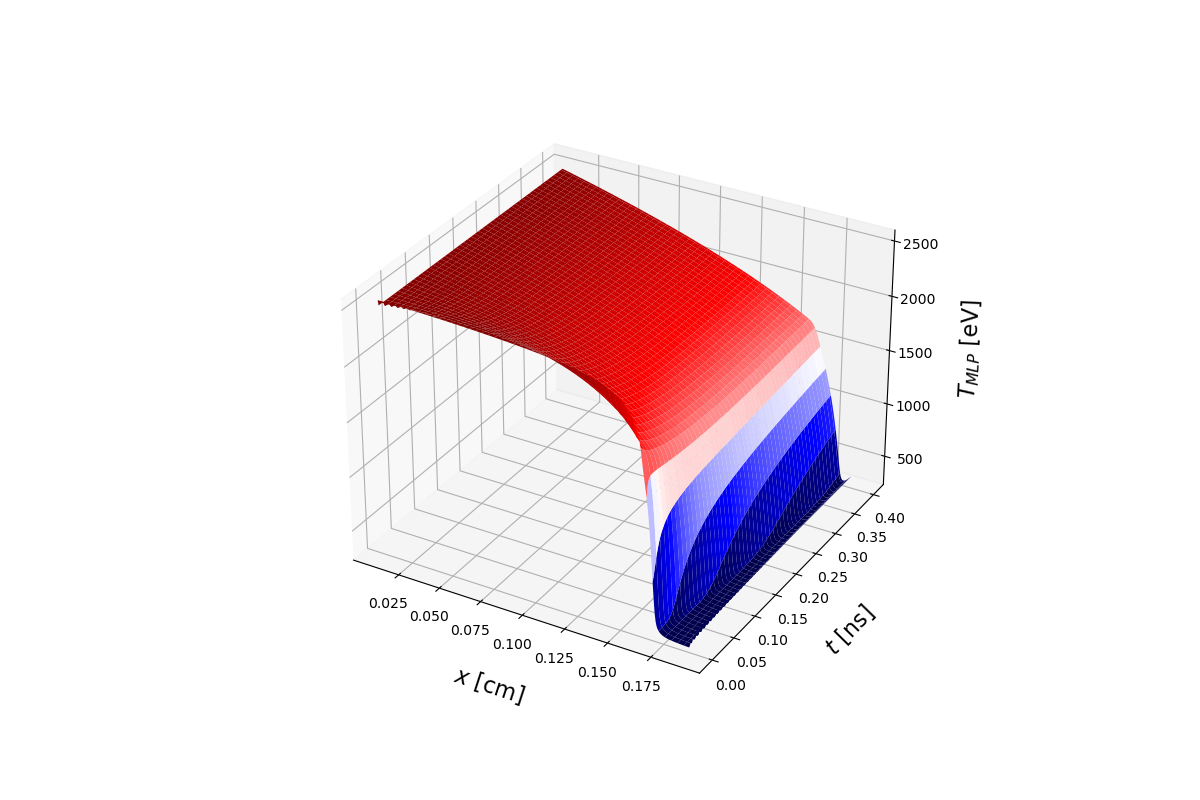

In [5]:
##NONLOCAL
pp.evolutionField(T[T.columns[:endframe]], r'$T$ [eV]')